<a href="https://colab.research.google.com/github/Haikal7090/TUBES-LIDEA-7/blob/main/TUBES_LIDEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DEPENDECIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

# **LOAD DATA**

In [ ]:
!pip install gdown
!gdown --fuzzy "https://docs.google.com/spreadsheets/d/1mhDBGeIt2b6-FFKrolccp6Jog7ZvhrZN/edit?usp=sharing&ouid=116842443111305752575&rtpof=true&sd=true"

Downloading...
From: https://drive.google.com/uc?id=1mhDBGeIt2b6-FFKrolccp6Jog7ZvhrZN
To: /content/1744774003471_Data_Tugas_Besar_FINAL.xlsx
100% 1.40M/1.40M [00:00<00:00, 143MB/s]


In [ ]:
df = pd.read_excel("1744774003471_Data_Tugas_Besar_FINAL.xlsx")
df.head()

,NAME,DESCRIPTION,VALUE,UNITS,DATE_TIME,TAG,DATE_NO,Amount Comp_01
0,AA1,AA1_91_9500062414,0.0,Sm3/d,20210401,91_9500062414,44287,0.0
1,AA1,AA1_91_9500062414,0.0,Sm3/d,20210402,91_9500062414,44288,0.0
2,AA1,AA1_91_9500062414,0.0,Sm3/d,20210403,91_9500062414,44289,0.0
3,AA1,AA1_91_9500062414,0.0,Sm3/d,20210404,91_9500062414,44290,0.0
4,AA1,AA1_91_9500062414,0.0,Sm3/d,20210405,91_9500062414,44291,0.0


In [ ]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35200 entries, 0 to 35199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NAME            35200 non-null  object        
 1   DESCRIPTION     35200 non-null  object        
 2   VALUE           35200 non-null  float64       
 3   UNITS           35200 non-null  object        
 4   DATE_TIME       35200 non-null  datetime64[ns]
 5   TAG             35200 non-null  object        
 6   DATE_NO         35200 non-null  int64         
 7   Amount Comp_01  35200 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
df.drop(columns=['DATE_NO'], inplace=True)

In [ ]:
df.head()

,NAME,DESCRIPTION,VALUE,UNITS,DATE_TIME,TAG,Amount Comp_01
0,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-01,91_9500062414,0.0
1,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-02,91_9500062414,0.0
2,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-03,91_9500062414,0.0
3,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-04,91_9500062414,0.0
4,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-05,91_9500062414,0.0


# **EDA**

In [ ]:
df.shape

(34324, 7)

In [ ]:
print(df.describe())
print(f"Waktu Produksi : {df['DATE_TIME'].min()} sampai {df['DATE_TIME'].max()}")

              VALUE                      DATE_TIME  Amount Comp_01
count  34324.000000                          34324    34324.000000
mean      95.029560  2022-02-12 01:34:21.158373376       97.995125
min        0.000000            2021-04-01 00:00:00        0.000000
25%        8.000000            2021-09-04 00:00:00        8.000000
50%       34.950000            2022-02-11 00:00:00       34.950000
75%      222.080000            2022-07-22 00:00:00      222.080000
max      634.975000            2022-12-31 00:00:00     1883.000000
std      105.930758                            NaN      129.203932
Waktu Produksi : 2021-04-01 00:00:00 sampai 2022-12-31 00:00:00


In [ ]:
df['NAME'].value_counts()

,count
NAME,
AA5,6898
AA1,6881
AA2,6855
AA3,6854
AA4,6836


In [ ]:
df['DESCRIPTION'].value_counts()

,count
DESCRIPTION,
AA1_91_EP_NATURAL_GAS,640
AA1_ANPR,640
AA1_ANTP,640
AA1_C_PR,640
AA1_C_OP,640
AA1_C_TE,640
AA1_FBHP,640
AA2_FBHT,640
AA1_FBHT,640


In [ ]:
df['DESCRIPTION'].unique()

array(['AA1_91_9500062414', 'AA1_91_EP_NATURAL_GAS', 'AA1_ANPR',
       'AA1_ANTP', 'AA1_C_OP', 'AA1_C_PR', 'AA1_C_TE', 'AA1_FBHP',
       'AA1_FBHT', 'AA1_FTHP', 'AA1_FTHT', 'AA2_91_9500062414',
       'AA2_91_EP_NATURAL_GAS', 'AA2_ANPR', 'AA2_ANTP', 'AA2_C_OP',
       'AA2_C_PR', 'AA2_C_TE', 'AA2_FBHP', 'AA2_FBHT', 'AA2_FTHP',
       'AA2_FTHT', 'AA3_91_9500062414', 'AA3_91_EP_NATURAL_GAS',
       'AA3_ANPR', 'AA3_ANTP', 'AA3_C_OP', 'AA3_C_PR', 'AA3_C_TE',
       'AA3_FBHP', 'AA3_FBHT', 'AA3_FTHP', 'AA3_FTHT',
       'AA4_91_9500062414', 'AA4_91_EP_NATURAL_GAS', 'AA4_ANPR',
       'AA4_ANTP', 'AA4_C_OP', 'AA4_C_PR', 'AA4_C_TE', 'AA4_FBHP',
       'AA4_FBHT', 'AA4_FTHP', 'AA4_FTHT', 'AA5_91_9500062414',
       'AA5_91_EP_NATURAL_GAS', 'AA5_ANPR', 'AA5_ANTP', 'AA5_C_OP',
       'AA5_C_PR', 'AA5_C_TE', 'AA5_FBHP', 'AA5_FBHT', 'AA5_FTHP',
       'AA5_FTHT'], dtype=object)

In [ ]:
df['DESCRIPTION'].nunique()

55

In [ ]:
df['UNITS'].value_counts()

,count
UNITS,
bara,12800
°C,12800
%,3200
MMSCMD,3193
Sm3/d,2331


In [ ]:
df['TAG'].value_counts()

,count
TAG,
ANPR,3200
C_OP,3200
ANTP,3200
FBHP,3200
FBHT,3200
C_PR,3200
C_TE,3200
FTHP,3200
FTHT,3200


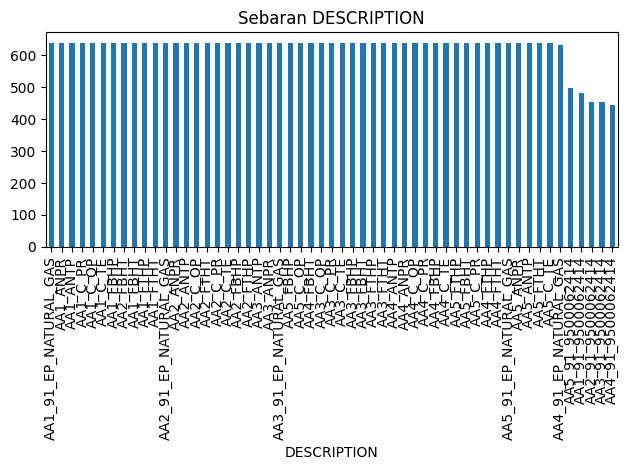

In [ ]:
df['DESCRIPTION'].value_counts().plot(kind='bar', title='Sebaran DESCRIPTION')
plt.tight_layout()
plt.show()

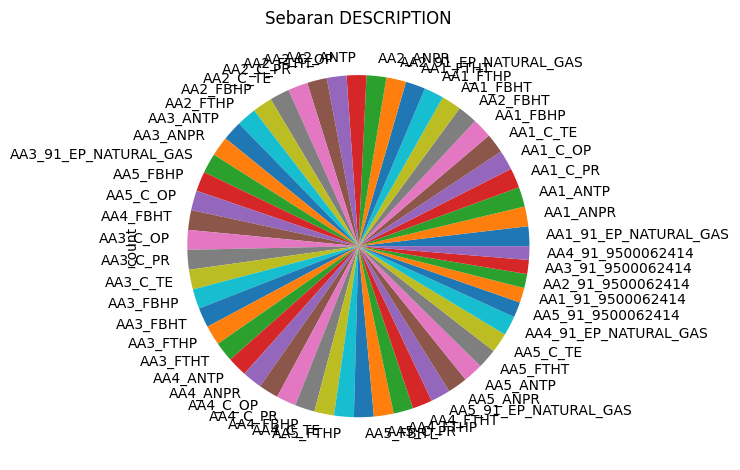

In [ ]:
df['DESCRIPTION'].value_counts().plot(kind='pie', title='Sebaran DESCRIPTION')
plt.tight_layout()
plt.show()

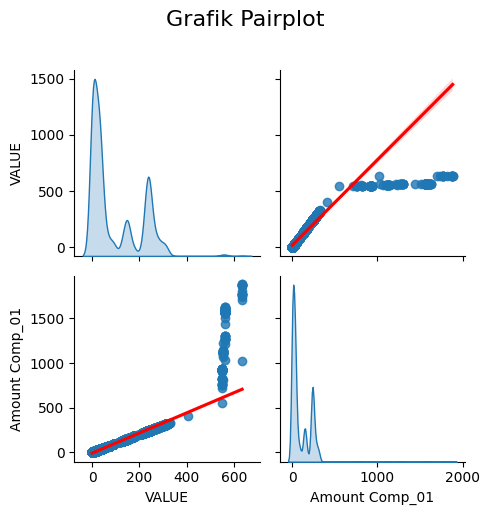

In [ ]:
pairplot = sns.pairplot(data=df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
pairplot.fig.suptitle("Grafik Pairplot", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

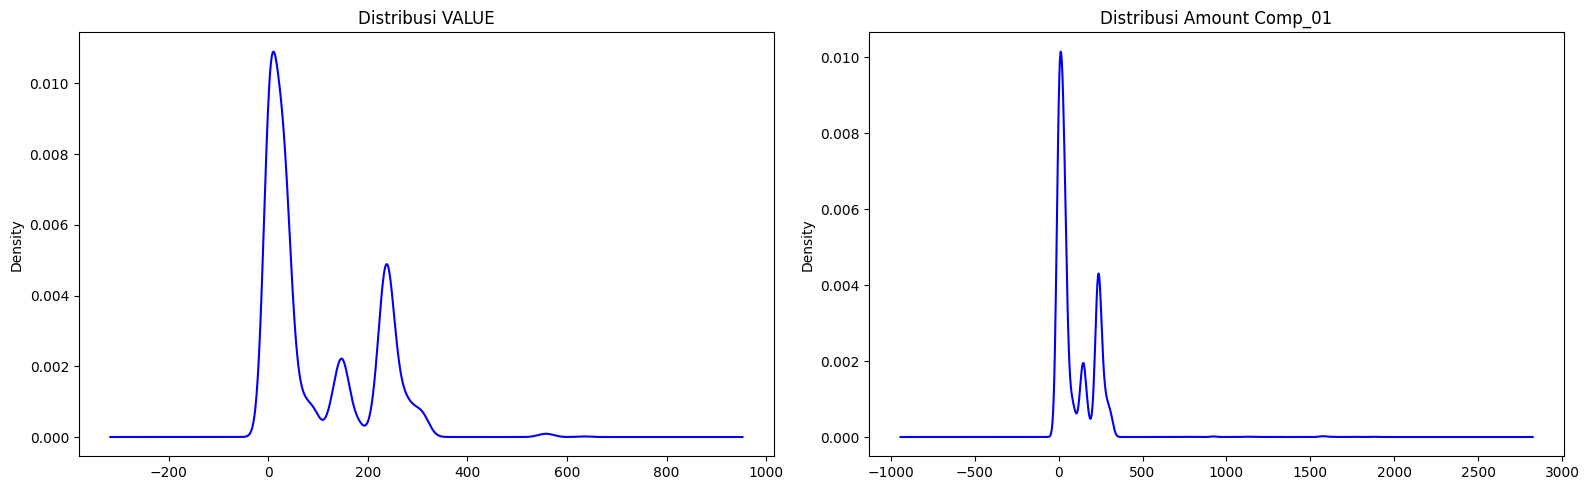

In [ ]:
# Plot KDE for Oil_Production and Gas_Production
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for axes, column in zip(ax, ["VALUE","Amount Comp_01"]):
    df[column].plot(kind='kde', ax=axes, color='blue', title=f'Distribusi {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Plot KDE for Oil_Production and Gas_Production
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for axes, column in zip(ax, ["VALUE","Amount Comp_01"]):
    df[column].plot(kind='kde', ax=axes, color='blue', title=f'Distribusi {column}')

plt.tight_layout()
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr(method='spearman')
print(correlation_matrix)

                VALUE  Amount Comp_01
VALUE             1.0             1.0
Amount Comp_01    1.0             1.0


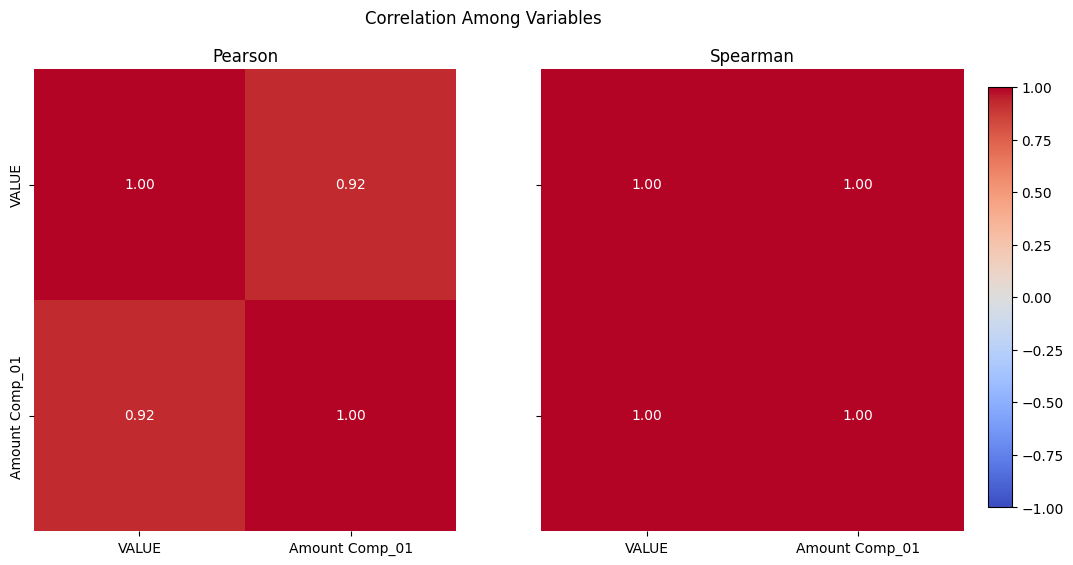

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
annot = True
fmt = '.2f'
cmap = 'coolwarm'

sns.heatmap(numeric_df.corr(method='pearson'), annot=annot, vmin=-1, vmax=1, fmt=fmt, cmap=cmap, ax=ax[0], cbar=False)
sns.heatmap(numeric_df.corr(method='spearman'), annot=annot, vmin=-1, vmax=1, fmt=fmt, cmap=cmap, ax=ax[1], cbar=False)

ax[0].set_title('Pearson')
ax[1].set_title('Spearman')
fig.suptitle('Correlation Among Variables')
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position and size as needed
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax, orientation='vertical')

plt.show()

Unique wells: ['AA1' 'AA2' 'AA3' 'AA4' 'AA5']
Well counts:
NAME
AA5    6898
AA1    6881
AA2    6855
AA3    6854
AA4    6836
Name: count, dtype: int64


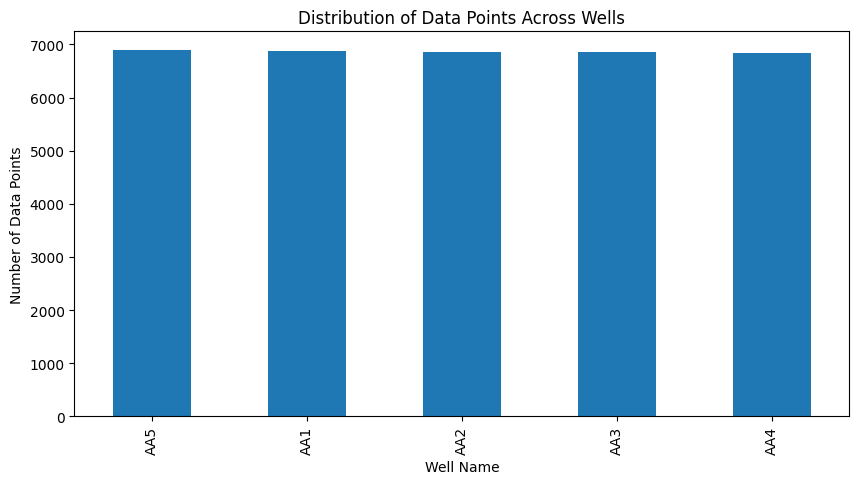

In [ ]:
# Analyze the 'NAME' column
unique_wells = df['NAME'].unique()
print(f"Unique wells: {unique_wells}")
well_counts = df['NAME'].value_counts()
print(f"Well counts:\n{well_counts}")
plt.figure(figsize=(10, 5))
well_counts.plot(kind='bar')
plt.title('Distribution of Data Points Across Wells')
plt.xlabel('Well Name')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
# Filter baris yang hanya berisi 'AA1_91_9500062414' pada kolom 'NAME'
df_AA1_water = df.loc[df['DESCRIPTION'] == 'AA1_91_9500062414']

df_AA1_water.tail()

df_AA1_water.shape

(640, 8)

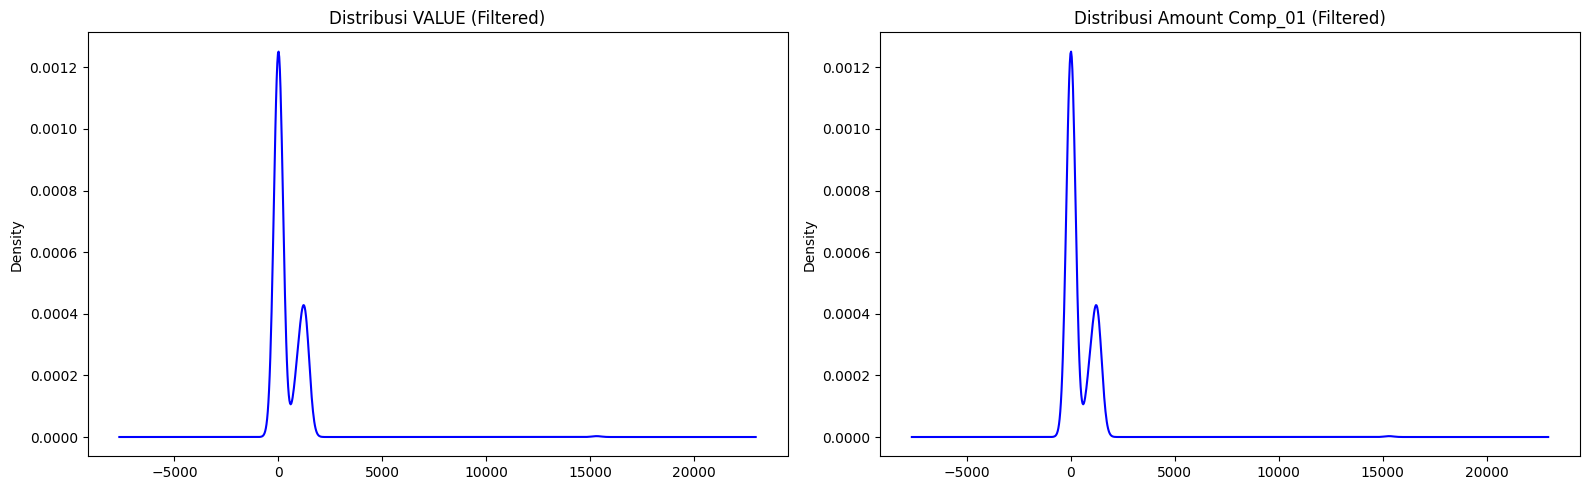

In [ ]:
# prompt: buat grafik distribusi untuk filtered_df

# Plot KDE for VALUE and Amount Comp_01 in filtered_df
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for axes, column in zip(ax, ["VALUE","Amount Comp_01"]):
    df_AA1_water[column].plot(kind='kde', ax=axes, color='blue', title=f'Distribusi {column} (Filtered)')

plt.tight_layout()
plt.show()


In [ ]:
df_AA1_water.replace(0, np.nan, inplace=True)

missing_percentage = df_AA1_water.isnull().sum() / len(df_AA1_water) * 100
missing_percentage

<ipython-input-9-fce1088afec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AA1_water.replace(0, np.nan, inplace=True)


,0
NAME,0.000
DESCRIPTION,0.000
VALUE,24.375
UNITS,0.000
DATE_TIME,0.000
TAG,0.000
DATE_NO,0.000
Amount Comp_01,24.375


In [ ]:
for column in df_AA1_water.columns:
    if missing_percentage[column] == 0:
        # Tidak ada missing values, lanjutkan
        continue
    elif missing_percentage[column] <= 5:
        # Jika missing values <= 5%, isi dengan mean (untuk numerik) atau modus (untuk kategorikal)
        if df_AA1_water[column].dtype in [np.float64, np.int64]:  # Kolom numerik
            df_AA1_water[column].fillna(df_AA1_water[column].mean(), inplace=True)
        else:  # Kolom kategorikal
            df_AA1_water[column].fillna(df[column].mode()[0], inplace=True)
    elif missing_percentage[column] <= 30:
        # Jika missing values antara 5% dan 30%, isi dengan median (untuk numerik) atau modus (untuk kategorikal)
        if df_AA1_water[column].dtype in [np.float64, np.int64]:  # Kolom numerik
            df_AA1_water[column].fillna(df_AA1_water[column].median(), inplace=True)
        else:  # Kolom kategorikal
            df_AA1_water[column].fillna(df_AA1_water[column].mode()[0], inplace=True)
    else:
        # Jika missing values > 30%, hapus kolom
        df_AA1_water.drop(columns=[column], inplace=True)

# Tampilkan hasil setelah pengisian
print("Data setelah mengisi nilai yang hilang:")
print(df_AA1_water.head())

Data setelah mengisi nilai yang hilang:
  NAME        DESCRIPTION  VALUE  UNITS  DATE_TIME            TAG  DATE_NO  \
0  AA1  AA1_91_9500062414   1.32  Sm3/d   20210401  91_9500062414    44287   
1  AA1  AA1_91_9500062414   1.32  Sm3/d   20210402  91_9500062414    44288   
2  AA1  AA1_91_9500062414   1.32  Sm3/d   20210403  91_9500062414    44289   
3  AA1  AA1_91_9500062414   1.32  Sm3/d   20210404  91_9500062414    44290   
4  AA1  AA1_91_9500062414   1.32  Sm3/d   20210405  91_9500062414    44291   

   Amount Comp_01  
0            1.32  
1            1.32  
2            1.32  
3            1.32  
4            1.32  


<ipython-input-13-1113ff93f06a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_AA1_water[column].fillna(df_AA1_water[column].median(), inplace=True)
<ipython-input-13-1113ff93f06a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AA1_water[column].fillna(df_AA1_water[column].median(), inplace=True)


In [ ]:
missing_percentage

,0
NAME,0.0
DESCRIPTION,0.0
VALUE,0.0
UNITS,0.0
DATE_TIME,0.0
TAG,0.0
DATE_NO,0.0
Amount Comp_01,0.0


In [ ]:
df.columns

Index(['NAME', 'DESCRIPTION', 'VALUE', 'UNITS', 'DATE_TIME', 'TAG',
       'Amount Comp_01'],
      dtype='object')

In [ ]:
df_raw = df.copy()
df_raw.replace(0, np.nan, inplace=True)

missing_percentage = df_raw.isnull().sum() / len(df_raw) * 100
missing_percentage

,0
NAME,0.000000
DESCRIPTION,0.000000
VALUE,6.511364
UNITS,0.000000
DATE_TIME,0.000000
TAG,0.000000
Amount Comp_01,6.511364


# **DATA CLEANING**


In [ ]:
df.isna().sum()

,0
NAME,0
DESCRIPTION,0
VALUE,0
UNITS,0
DATE_TIME,0
TAG,0
DATE_NO,0
Amount Comp_01,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Menghapus nilai duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Mengecek Persentase Missing Value
columns = df.columns
for col in columns:
    missing_percent = df[col].isnull().mean() * 100
    print(f"Persentase Missing Value {col}: {missing_percent:.2f}%")

Persentase Missing Value NAME: 0.00%
Persentase Missing Value DESCRIPTION: 0.00%
Persentase Missing Value VALUE: 0.00%
Persentase Missing Value UNITS: 0.00%
Persentase Missing Value DATE_TIME: 0.00%
Persentase Missing Value TAG: 0.00%
Persentase Missing Value DATE_NO: 0.00%
Persentase Missing Value Amount Comp_01: 0.00%


In [ ]:
df.columns

Index(['NAME', 'DESCRIPTION', 'VALUE', 'UNITS', 'DATE_TIME', 'TAG', 'DATE_NO',
       'Amount Comp_01'],
      dtype='object')

In [ ]:
# Hitung Z-score untuk setiap kolom
z_scores = numeric_df.apply(zscore)  # Hitung Z-score untuk setiap kolom

# Mask untuk mendeteksi outlier (Z-score > 3 atau Z-score < -3)
outlier_mask = np.abs(z_scores) > 3

# Hitung jumlah outlier untuk setiap kolom
outlier_counts = {}
for column in numeric_df:
    outlier_counts[column] = outlier_mask[column].sum()  # Hitung jumlah True (outlier)

# Tampilkan hasil
outlier_counts

{'VALUE': np.int64(710),
 'DATE_NO': np.int64(0),
 'Amount Comp_01': np.int64(710)}

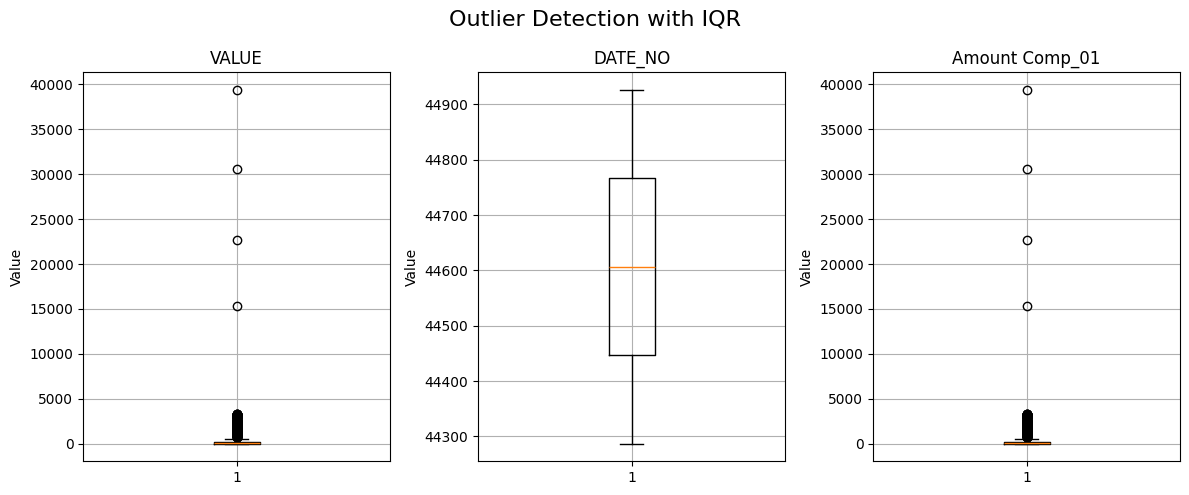

In [ ]:
# --- Visualisasi Boxplot untuk Validasi Outlier ---

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # Subplot untuk setiap kolom

# Loop setiap kolom dan buat boxplot-nya
for i, col in enumerate(numeric_df):
    axes[i].boxplot(df[col].dropna())  # Drop NaN sebelum membuat boxplot
    axes[i].set_title(col)  # Set judul masing-masing subplot
    axes[i].set_ylabel('Value')  # Label sumbu y
    axes[i].grid(True)  # Tambahkan grid

# Set layout agar tidak overlapping
plt.suptitle('Outlier Detection with IQR', fontsize=16)  # Judul utama
plt.tight_layout()  # Atur layout agar pas dengan judul
plt.show()

In [ ]:
for well in df['NAME'].unique():
    well_data = df[df['NAME'] == well]
    Q1 = well_data['VALUE'].quantile(0.25)
    Q3 = well_data['VALUE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df['NAME'] == well) & ((df['VALUE'] < lower_bound) | (df['VALUE'] > upper_bound)), 'VALUE'] = df.loc[(df['NAME'] == well) & (df['VALUE'] > upper_bound), 'VALUE'].apply(lambda x: upper_bound if x > upper_bound else x)
    df.loc[(df['NAME'] == well) & ((df['VALUE'] < lower_bound) | (df['VALUE'] > upper_bound)), 'VALUE'] = df.loc[(df['NAME'] == well) & (df['VALUE'] < lower_bound), 'VALUE'].apply(lambda x: lower_bound if x < lower_bound else x)

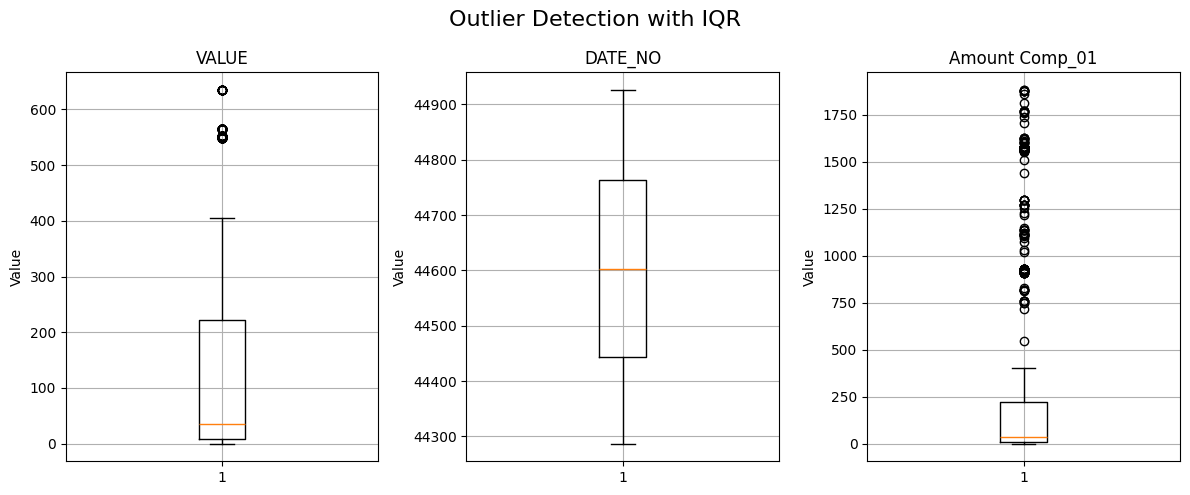

In [ ]:
# --- Visualisasi Boxplot untuk Validasi Outlier ---

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # Subplot untuk setiap kolom

# Loop setiap kolom dan buat boxplot-nya
for i, col in enumerate(numeric_df):
    axes[i].boxplot(df[col].dropna())  # Drop NaN sebelum membuat boxplot
    axes[i].set_title(col)  # Set judul masing-masing subplot
    axes[i].set_ylabel('Value')  # Label sumbu y
    axes[i].grid(True)  # Tambahkan grid

# Set layout agar tidak overlapping
plt.suptitle('Outlier Detection with IQR', fontsize=16)  # Judul utama
plt.tight_layout()  # Atur layout agar pas dengan judul
plt.show()

In [ ]:
lower_bound

np.float64(-329.07749999999993)

In [ ]:
upper_bound

np.float64(564.2624999999999)